<a href="https://colab.research.google.com/github/Prospkt/neural_net_stuff/blob/main/classificao_binaria_casederram_oleo_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [37]:
dados = read_csv('/content/derramamento de Oleo.csv', sep=",")
dados

,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,214.7,0.21,0.26,0.49,0.1,0.4,99.59,32.19,1.84,0.16,0.2,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.2,-3.71,-0.18,2.19,0.1.1,2.19.1,310,16110,0.2.1,138.68,89,69,2850,1000,763.16,135.46,3.73,0.3,33243.19,65.74,7.95,1.1
0,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
1,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
2,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
3,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
4,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,86.0,0.18,0.25,0.53,0.15,0.38,55.25,29.21,2.01,0.16,0.22,87.65,0,0.51,132.78,-0.01,3.78,0.57,3.34,-3.89,-0.25,1.96,0.0,1.96,12,720,0.01,18.26,89,69,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,110.0,0.23,0.26,0.34,0.19,0.15,23.89,17.00,0.40,0.23,0.26,55.85,0,1.06,221.97,0.87,5.07,0.95,3.03,-1.25,-0.53,1.10,0.0,1.10,8,540,0.01,8.04,82,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
932,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,107.2,0.18,0.20,0.25,0.16,0.09,37.36,26.33,0.40,0.18,0.20,55.85,0,1.07,221.97,0.87,5.07,1.19,3.39,-1.70,-0.64,1.23,0.0,1.23,9,630,0.01,7.75,82,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
933,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,133.9,0.28,0.26,0.30,0.21,0.09,12.91,15.23,0.40,0.28,0.26,55.85,0,1.08,221.97,0.87,5.07,1.60,5.08,-0.90,-0.55,1.09,0.0,1.09,7,450,0.00,6.33,82,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
934,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,97.5,0.23,0.24,0.26,0.23,0.03,20.41,18.11,0.40,0.23,0.24,55.85,0,1.07,221.97,0.87,5.07,0.99,2.94,-1.31,-0.36,1.09,0.0,1.09,7,540,0.01,8.53,82,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


In [38]:
X = dados.values[:,0:49]
y = dados.values[:,49]

In [44]:
# Geracao dos arquivos de treino, teste e validacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
# Geracao do modelo 
model = Sequential()
model.add(Dense(100, activation= 'tanh', kernel_initializer= 'he_normal', input_shape=(49,))) #50 colunas-1
model.add(Dense(80, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid')) 

In [46]:
# Compilacao do modelo 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])


In [47]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
24/24 [==============================] - 1s 9ms/step - loss: 0.4002 - accuracy: 0.8085 - val_loss: 0.1538 - val_accuracy: 0.9681
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9581 - val_loss: 0.1419 - val_accuracy: 0.9681
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9518 - val_loss: 0.1422 - val_accuracy: 0.9681
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9494 - val_loss: 0.1400 - val_accuracy: 0.9681
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9569 - val_loss: 0.1421 - val_accuracy: 0.9681
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9552 - val_loss: 0.1405 - val_accuracy: 0.9681
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9462 - val_loss: 0.1384 - val_accuracy: 0.9681
Epoch 8/50
24/24 [==

<function matplotlib.pyplot.legend>

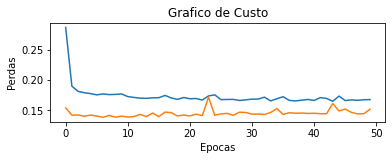

In [54]:
#GRAFICO - plot loss durante treinamenti=o
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'], label= 'Perdas durante os Treinamentos')
plt.plot(history.history['val_loss'], label= 'Perdas durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend

<function matplotlib.pyplot.legend>

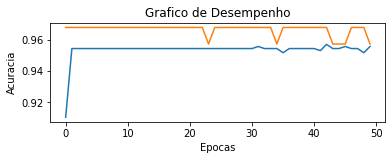

In [56]:
#GRAFICO - plot accuracy durante treinament-
plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'], label= 'Acuracia durante os Testes')
plt.plot(history.history['val_accuracy'], label= 'Acuracia durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend